**Author: Riadul Islam Rabbi**

<hr>
<h1><center>Marketing Analytics : Customer Chrun Prediction</center></h1>
<hr>

##Importing Libraries

In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score



##Loading and View Dataset

In [2]:
chrun_df = pd.read_csv("https://raw.githubusercontent.com/SKawsar/machine_learning_with_python/main/Churn.csv")
chrun_df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
chrun_df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [4]:
chrun_df.shape

(3333, 21)

In [5]:
chrun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [6]:
chrun_df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [7]:
chrun_df.describe(include='object')

,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,329-6603
freq,2850,3010,2411,106,1


##Data Preprocessing

##Label Encoder

In [8]:
le = LabelEncoder()

for col in chrun_df:
  if chrun_df[col].dtypes == 'object':
    chrun_df[col] = le.fit_transform(chrun_df[col])

display(chrun_df.head()) 
chrun_df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,16,415,1926
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,35,415,1575
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,31,415,1117
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,35,408,1707
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,36,415,110


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

## Separating the  features and labels

In [9]:
X = chrun_df.drop('Churn', axis = 1)
y = chrun_df[['Churn']]

print(X.shape, y.shape)

(3333, 20) (3333, 1)


####One Hot Encoding

In [23]:
#chrun_df_1 = pd.get_dummies(chrun_df, columns=['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], drop_first=True)
#display(chrun_df_1.head())

#Perform Data Transformation (Standard Scaler or Min Max Scaler)

####Min-Max Scaler

In [15]:
mm_scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = mm_scaler.fit_transform(X_train)
rescaled_X_test = mm_scaler.fit_transform(X_test)

#### Standard Scaler

In [40]:
std_scaler = StandardScaler()
std_X_train = mm_scaler.fit_transform(X_train)
std_X_test = mm_scaler.fit_transform(X_test)

###Split the dataset intro train and test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 20) (667, 20) (2666, 1) (667, 1)


#Model

###Perform Grid Search and Cross-Validation with Decision Tree Classifier using Min-Max Scaler

In [16]:
parameters = {'criterion':['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator= model,
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 5, 
                           n_jobs = -1)
# fit the model with the best hyper-parameter
#rescaled_X = mm_scaler.fit_transform(X_train)
grid_result = grid_search.fit(rescaled_X_train, y_train)

In [17]:
y_pred = np.round(grid_result.predict(rescaled_X_test))
print(y_pred[0:10])
print(y_test[0:10])

[1 1 1 0 0 0 0 0 0 0]
      Churn
2646      0
977       1
2433      0
221       0
1644      0
2104      0
450       0
2002      0
1895      0
2070      0


In [18]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 7}

###Perform Grid Search and Cross-Validation with Decision Tree Classifier using Standard Scaler

In [41]:
parameters = {'criterion':['gini', 'entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator= model,
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 5, 
                           n_jobs = -1)
# fit the model with the best hyper-parameter

grid_result_1 = grid_search.fit(std_X_train, y_train)

In [47]:
grid_result_1.best_params_

{'criterion': 'gini', 'max_depth': 7}

###Show a tree diagram of the Decision Tree

In [36]:
model_dt = DecisionTreeClassifier()
model_dt.fit(std_X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

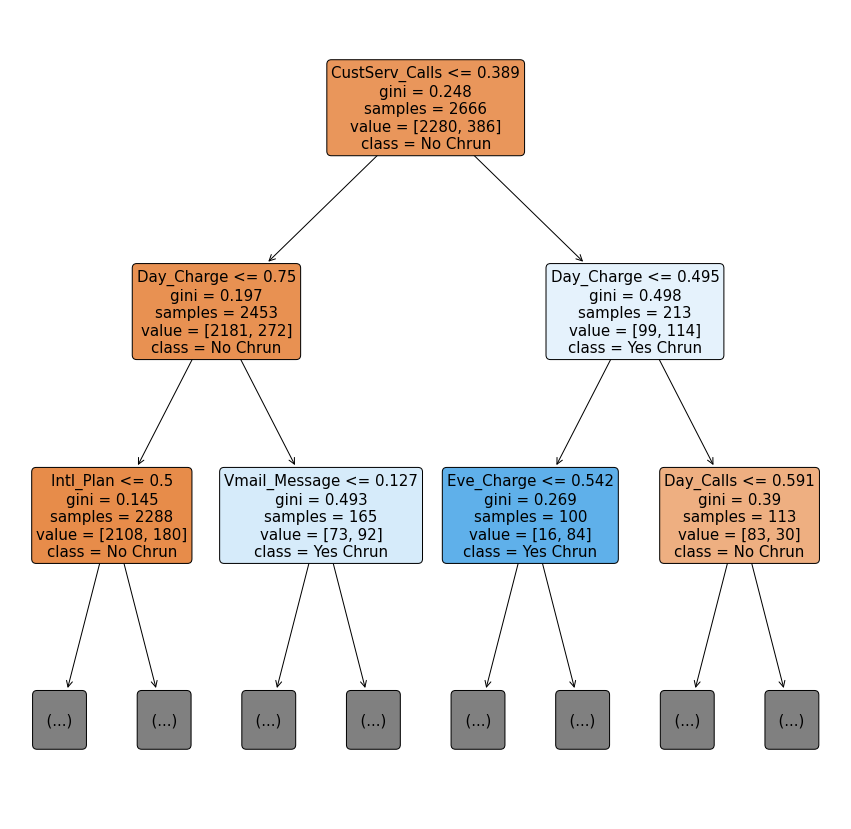

In [37]:
plt.figure(figsize = (15, 15))
plot_tree(model_dt, filled = True, rounded = True, class_names = ["No Chrun", "Yes Chrun"], feature_names=X.columns, max_depth = 2, fontsize=15)
plt.show()

#Model performance evaluation with the best found model in grid search and cross-validation

#Evaluation

###Show the Confusion Matrix, Classification report, and ROC-AUC

##Using Min-Max Scaler

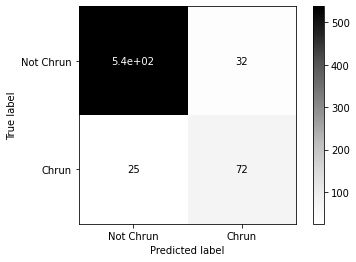

In [44]:
plot_confusion_matrix(grid_result,rescaled_X_test, y_test, display_labels = ["Not Chrun", "Chrun"], cmap = 'Greys')
plt.show()

In [28]:
confusion_matrix_grid_dt = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", confusion_matrix_grid_dt)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[538  32]
 [ 25  72]]
Accuracy:  0.9145427286356822
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.69      0.74      0.72        97

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.92      0.91      0.92       667



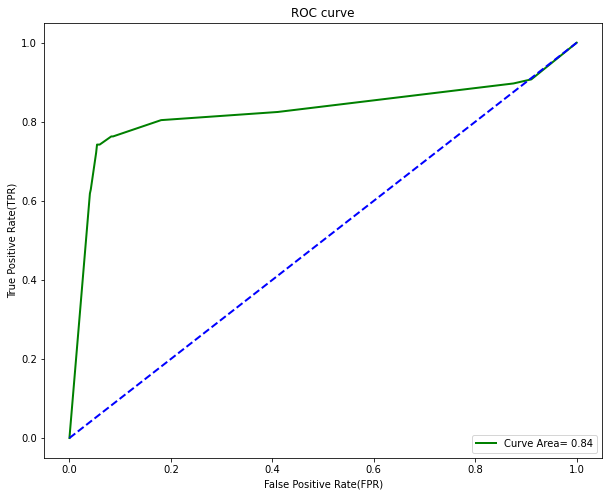

In [29]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(rescaled_X_test)[:, 1])

auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'green', lw = 2, label = "Curve Area= " +str(auc))
plt.plot([0,1], [0, 1], color = 'blue',lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

## Using Standard Scaler

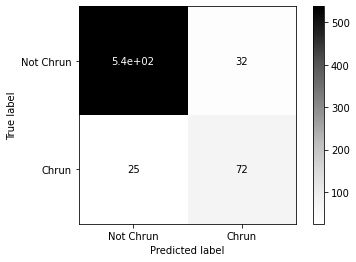

In [45]:
plot_confusion_matrix(grid_result_1,rescaled_X_test, y_test, display_labels = ["Not Chrun", "Chrun"], cmap = 'Greys')
plt.show()

In [46]:
confusion_matrix_grid_dt = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", confusion_matrix_grid_dt)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[538  32]
 [ 25  72]]
Accuracy:  0.9145427286356822
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.69      0.74      0.72        97

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.92      0.91      0.92       667



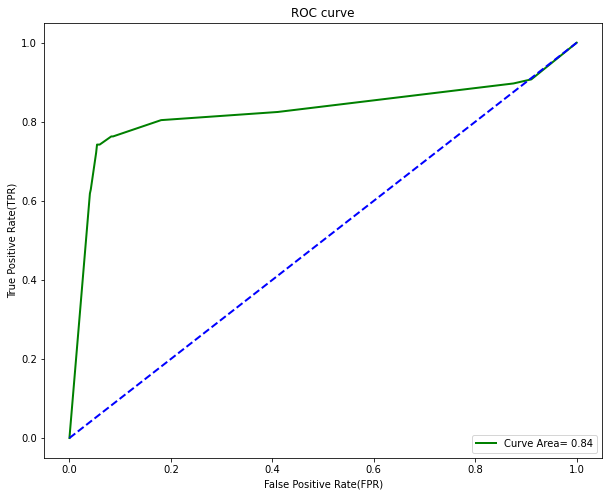

In [48]:
fpr, tpr, thr = roc_curve(y_test, grid_result_1.predict_proba(std_X_test)[:, 1])

auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color = 'green', lw = 2, label = "Curve Area= " +str(auc))
plt.plot([0,1], [0, 1], color = 'blue',lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend(loc = "lower right")
plt.show()

###Explain accuracy, precision, recall, f1 score